In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
def histogram_equalization_gray(image):
    # Passo 1: Obter histograma
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    
    # Passo 2: Normalizar o histograma
    hist_normalized = hist / float(image.shape[0] * image.shape[1])
    
    # Passo 3: Obter Histograma de soma acumulada
    cdf = hist_normalized.cumsum()
    
    # Passo 4: Gerar mapeamento usando L=256 e o histograma de soma acumulada
    mapping = (cdf * 255).astype('uint8')
    
    # Passo 5: Mapear os pixels da imagem de entrada para seus novos valores usando o mapeamento
    equalized_image = mapping[image]
    
    return equalized_image, mapping, hist_normalized


In [30]:
def histogram_equalization_color(image):
    equalized_channels = []
    for channel in cv2.split(image):
        equalized_channel, _, _ = histogram_equalization_gray(channel)
        equalized_channels.append(equalized_channel)
    return cv2.merge(equalized_channels)

In [31]:
def calculate_color_histogram(image):
    # Dividindo a imagem em seus canais de cores R, G e B
    channels = cv2.split(image)
    
    # Calculando os histogramas para cada canal de cor
    hist_channels = [cv2.calcHist([channel], [0], None, [256], [0,256]) for channel in channels]
    
    return hist_channels


In [32]:
def histogram_equalization_hsv(image, equalize_hue=False, equalize_saturation=False, equalize_value=True):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_image)

    # Equalize chosen channels
    if equalize_hue:
        h_equalized, _, _ = histogram_equalization_gray(h)
    else:
        h_equalized = h
    
    if equalize_saturation:
        s_equalized, _, _ = histogram_equalization_gray(s)
    else:
        s_equalized = s
    
    if equalize_value:
        v_equalized, _, _ = histogram_equalization_gray(v)
    else:
        v_equalized = v

    equalized_hsv_image = cv2.merge([h_equalized, s_equalized, v_equalized])
    return cv2.cvtColor(equalized_hsv_image, cv2.COLOR_HSV2BGR)


In [33]:
def plot_histograms(image, equalized_image, hist_channels, equalized_hist_channels):
    plt.figure(figsize=(12, 14))

    plt.subplot(4, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(4, 2, 2)
    plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
    plt.title('Equalized Image')
    plt.axis('off')

    colors = ['r', 'g', 'b']
    for i, color in enumerate(colors):
        plt.subplot(4, 2, i*2+3)
        plt.bar(np.arange(len(hist_channels[i])), hist_channels[i].flatten(), color=color, alpha=0.7, label=color.upper())
        plt.title('Original Histogram - ' + color.upper())

        plt.subplot(4, 2, i*2+4)
        plt.bar(np.arange(len(equalized_hist_channels[i])), equalized_hist_channels[i].flatten(), color=color, alpha=0.7, label=color.upper())
        plt.title('Equalized Histogram - ' + color.upper())

    plt.tight_layout()
    plt.show()

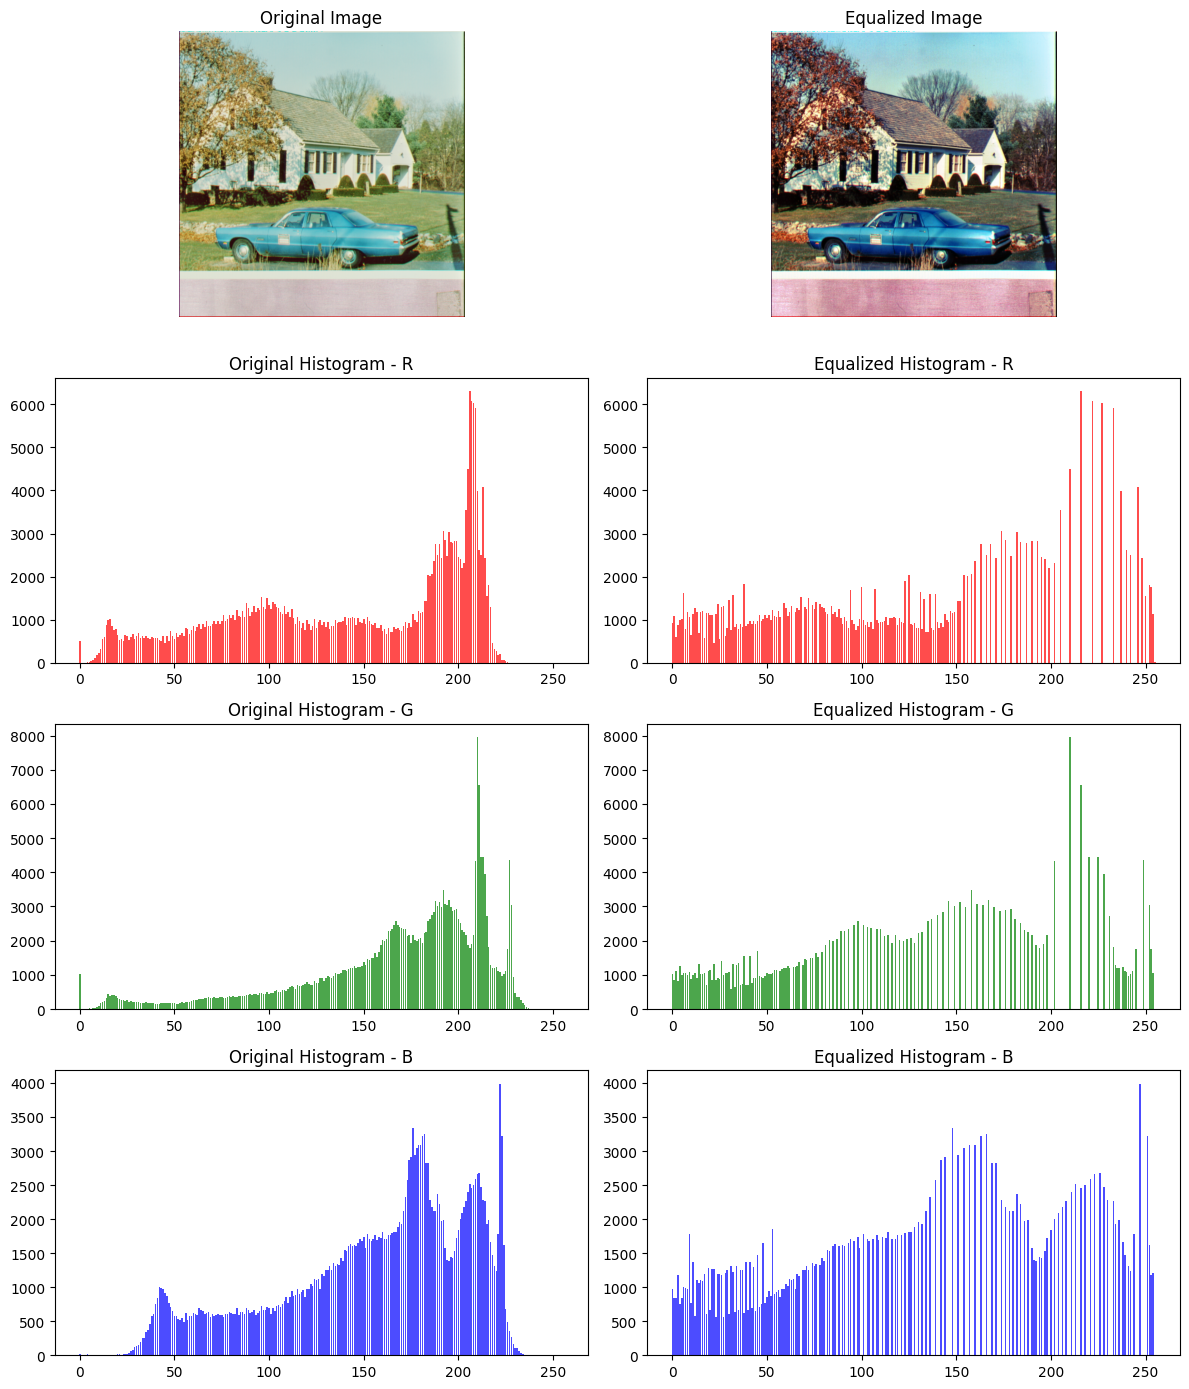

In [34]:


# Carregar a imagem colorida
color_image = cv2.imread('carro_colorido.tiff')

# Calcular histogramas de cores para a imagem original
hist_channels = calculate_color_histogram(color_image)

# Equalizar a imagem colorida
equalized_color_image = histogram_equalization_color(color_image)

# Calcular histogramas de cores para a imagem equalizada
equalized_hist_channels = calculate_color_histogram(equalized_color_image)

# Plotar as imagens e histogramas
plot_histograms(color_image, equalized_color_image, hist_channels, equalized_hist_channels)


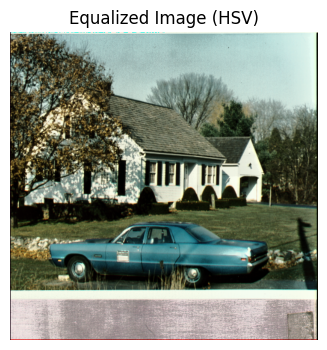

In [35]:
# Equalização do histograma para imagem colorida no espaço HSV
equalized_hsv_image = histogram_equalization_hsv(color_image)

# Mostrar a imagem equalizada no espaço HSV
plt.figure(figsize=(8, 4))
plt.imshow(cv2.cvtColor(equalized_hsv_image, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image (HSV)')
plt.axis('off')
plt.show()